In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
documents = ["There were slight scratches on camera glass of Oneplus8. It was like a refurbished product.", 
            "Oneplus8 Front Camera Defect. Raised Complaint against this but no response.", 
            "The Cameras, they are actually Flagship level this Oneplus8.", 
            "As soon as u open the camera Samsung S21 heats up, Waste of money.", 
            "I would say this Samsung S21 is one of the best smartphone display I have ever seen.",
            "Everything is awesome except the weight of Samsung S21."]

In [3]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(documents)

In [4]:
terms = vectorizer.get_feature_names()
 
from sklearn.metrics.pairwise import cosine_similarity 
dist = 1- cosine_similarity(X)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#cosine_similarity measures the similarity between two vector of an  inner product space


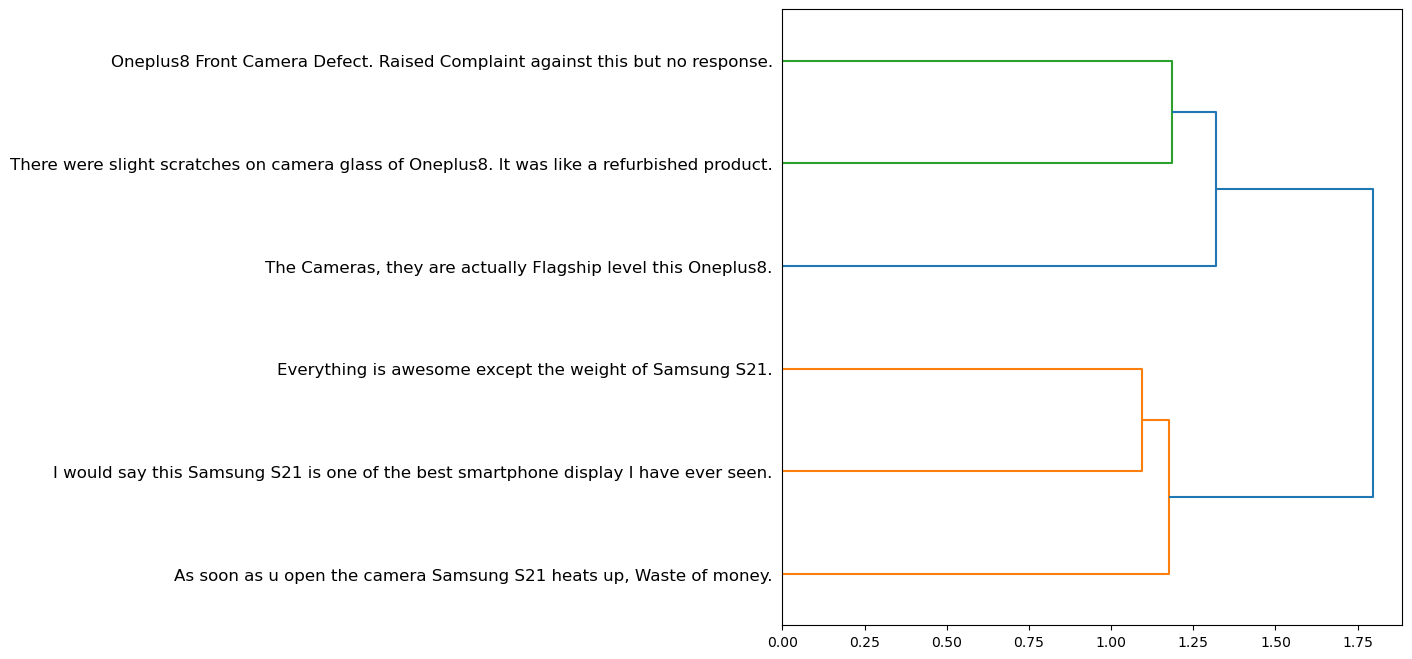

In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)
fig, ax = plt.subplots(figsize=(8, 8)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels = documents);

In [ ]:
#ward method is actually a method that tries to minimize the variance within each cluster
#subplot the layout is organized in raws and cloumns which are represented by the first and second argument

In [6]:
model = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 1)
model.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [ ]:
#K-means++  this algorithm ensures a smarter initialization of the centriods
#and improves the quality of centriods and improves the qualityof the clustring 

In [7]:
# top ten terms/words per cluster
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster Number:", i), 
    for c in order_centroids[i, :10]: 
        print('%s' % terms[c])

Cluster Number: 0
samsung
s21
weight
awesome
display
smartphone
seen
best
say
open
Cluster Number: 1
oneplus8
camera
level
cameras
flagship
actually
response
raised
complaint
defect


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
Y = vectorizer.transform(["SJCC class of Python"])
model.predict(Y)

array([1])